## 소프트맥스 회귀 실습
* 붓꽃 품종 분류 문제
  * 4개의 특성을 가지고 3개 중 어떤 품종인지 예측하는 문제

### 1.데이터 불러오기(이해)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")

data = pd.read_csv('Iris.csv', encoding='latin1')

print('샘플의 개수 :', len(data))
print(data[:5])

샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# 중복없이 데이터의 모든 종류 출력
print(data["Species"].unique(), sep='\n')

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


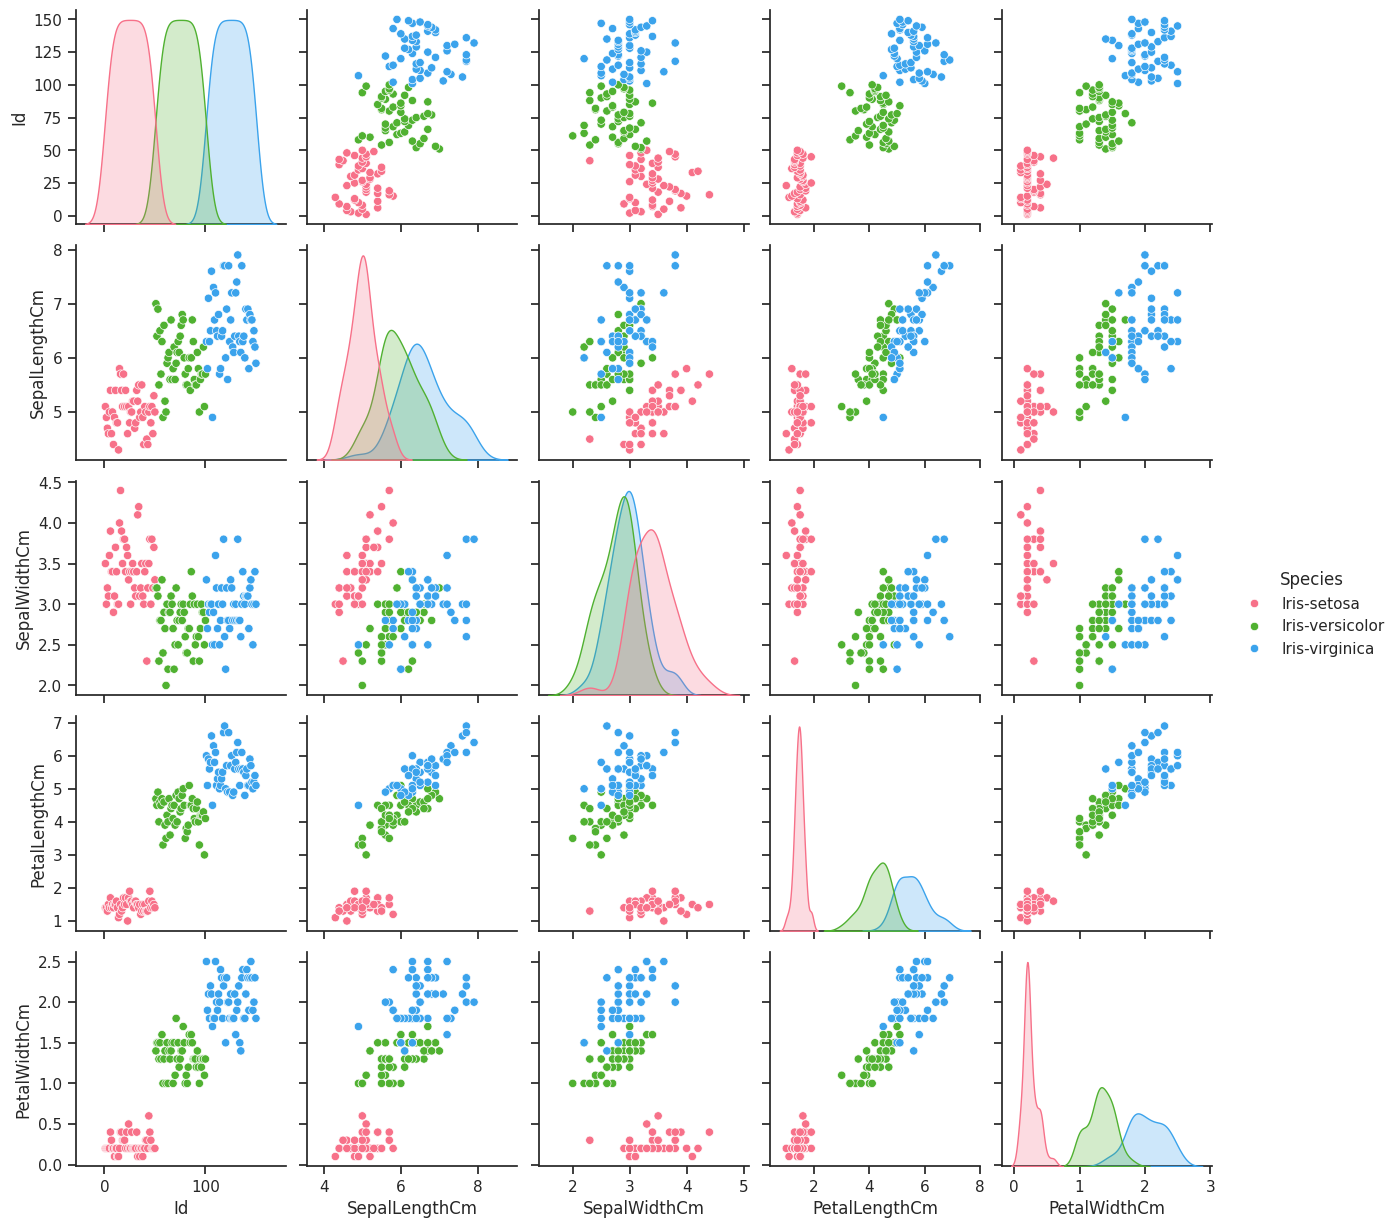

In [4]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

<ipython-input-5-f3569fca26b9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Species', y='SepalWidthCm', data=data, ci=None)


<Axes: xlabel='Species', ylabel='SepalWidthCm'>

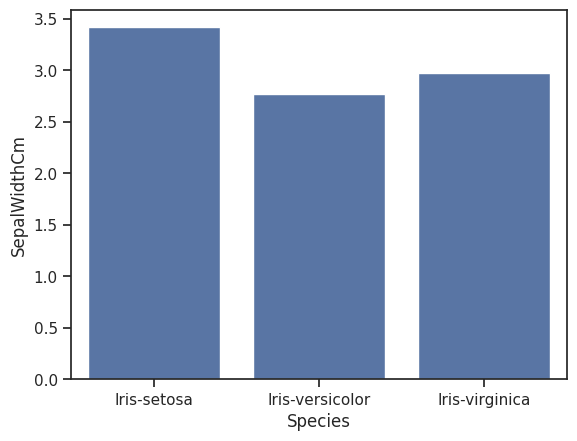

In [5]:
# 각 종과 특성에 대한 연관 관계
sns.barplot(x='Species', y='SepalWidthCm', data=data, ci=None)

<Axes: xlabel='Species'>

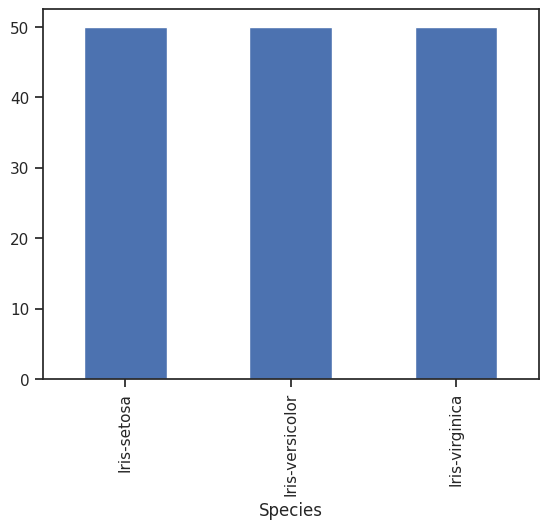

In [6]:
data['Species'].value_counts().plot(kind='bar')

### 2.데이터 전처리

<Axes: xlabel='Species'>

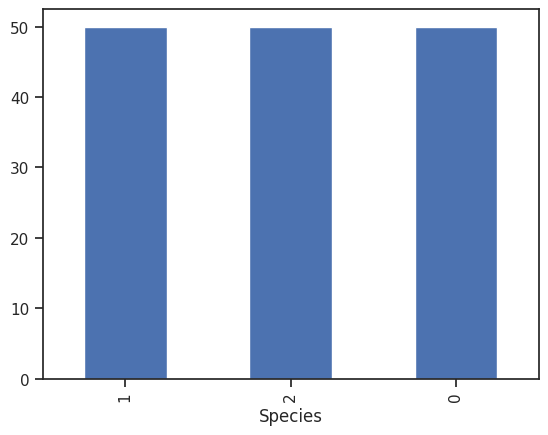

In [7]:
# 정수인코딩
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [9]:
# X 데이터. 특성은 총 4개.
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Y 데이터. 예측 대상.
data_y = data['Species'].values

In [10]:
# 데이터 분리
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


### 3.소프트맥스 회귀

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/200
120/120 [==============================] - 1s 4ms/step - loss: 4.5829 - accuracy: 0.3083 - val_loss: 2.5745 - val_accuracy: 0.4333
Epoch 2/200
120/120 [==============================] - 0s 2ms/step - loss: 3.1003 - accuracy: 0.3083 - val_loss: 1.6098 - val_accuracy: 0.4333
Epoch 3/200
120/120 [==============================] - 0s 2ms/step - loss: 1.9982 - accuracy: 0.5250 - val_loss: 1.0937 - val_accuracy: 0.8000
Epoch 4/200
120/120 [==============================] - 0s 2ms/step - loss: 1.2605 - accuracy: 0.6333 - val_loss: 0.8302 - val_accuracy: 0.8000
Epoch 5/200
120/120 [==============================] - 0s 3ms/step - loss: 0.8812 - accuracy: 0.6417 - val_loss: 0.7920 - val_accuracy: 0.7333
Epoch 6/200
120/120 [==============================] - 0s 3ms/step - loss: 0.7729 - accuracy: 0.7083 - val_loss: 0.7914 - val_accuracy: 0.5667
Epoch 7/200
120/120 [==============================] - 0s 3ms/step - loss: 0.7318 - accuracy: 0.7417 - val_loss: 0.7895 - val_accuracy: 0.5667

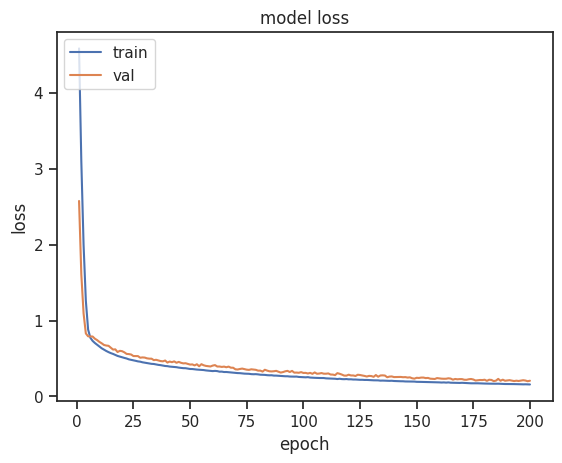

In [14]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 372ms/step - loss: 0.2073 - accuracy: 0.9667

 테스트 정확도: 0.9667
